<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [0]:
# 1. import dataset 
from keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [0]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [0]:
# 2. normalize features
from sklearn.preprocessing import MinMaxScaler, Normalizer

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [0]:
# 3. import models and layers from Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np

In [0]:
# 4. instantiate model object, use model.add() to add layers, single output mode
# use activation layers appropriate for task
# in this case, relu is better for optimal model fit

# input dimension: 13 bc of X features/dimensions

model = Sequential()

# input, hidden, output
model.add(Dense(5, input_dim=13, activation="relu"))
model.add(Dense(3, activation="relu"))
model.add(Dense(1, activation="softmax"))

In [0]:
# 5. compile model
model.compile(loss='mse', optimizer='adam',
              metrics=['mse','mae'])

In [0]:
# 6. fit model
# validation_split: validation data will be the last x% of data (not shuffled)
# 

hist = model.fit(X_train, y_train, epochs=150, validation_split=0.2)


Train on 323 samples, validate on 81 samples
Epoch 1/150
323/323 [==============================] - 0s 282us/sample - loss: 528.5834 - mean_squared_error: 528.5834 - mean_absolute_error: 21.0814 - val_loss: 597.3483 - val_mean_squared_error: 597.3483 - val_mean_absolute_error: 22.6457
Epoch 2/150
323/323 [==============================] - 0s 105us/sample - loss: 528.5834 - mean_squared_error: 528.5834 - mean_absolute_error: 21.0814 - val_loss: 597.3483 - val_mean_squared_error: 597.3483 - val_mean_absolute_error: 22.6457
Epoch 3/150
323/323 [==============================] - 0s 81us/sample - loss: 528.5834 - mean_squared_error: 528.5834 - mean_absolute_error: 21.0814 - val_loss: 597.3483 - val_mean_squared_error: 597.3483 - val_mean_absolute_error: 22.6457
Epoch 4/150
323/323 [==============================] - 0s 65us/sample - loss: 528.5834 - mean_squared_error: 528.5834 - mean_absolute_error: 21.0814 - val_loss: 597.3483 - val_mean_squared_error: 597.3483 - val_mean_absolute_error: 2

{'loss': [528.5833759130708, 528.5833787002799, 528.5833796923374, 528.5833846053841, 528.5833900853207, 528.5833734565475, 528.5833879122424, 528.5833790309658, 528.5833770468508, 528.5833692993542, 528.5833771413324, 528.5833864950174, 528.5833678821292, 528.5833757241074, 528.5833732675842, 528.5833864950174, 528.5833661814593, 528.5833761020342, 528.5833806371542, 528.5833832826407, 528.5833783695941, 528.5833795978558, 528.5833784640758, 528.5833794088925, 528.5833785113166, 528.5833661814593, 528.5833829991958, 528.583360040151, 528.5833739761966, 528.5833844164208, 528.5833746848092, 528.5833891405041, 528.5833741179192, 528.5833736455108, 528.5833890460224, 528.5833785585575, 528.5833897073941, 528.5833708110608, 528.5833688269458, 528.5833757241074, 528.5833864950174, 528.5833793144108, 528.5833960376657, 528.5833819598975, 528.5833738344742, 528.5833765272016, 528.5833808261175, 528.5833730786209, 528.5833740234375, 528.5833793144108, 528.5833796923374, 528.5833819598975, 528

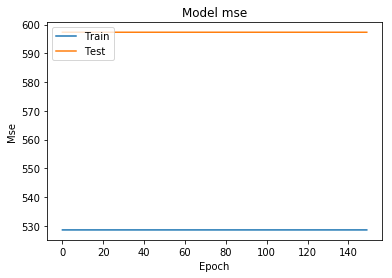

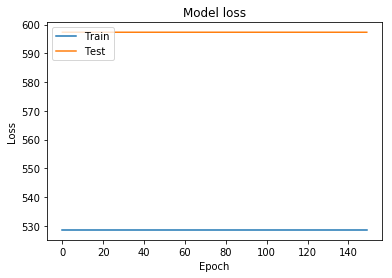

In [0]:
# 7. Use the history object that is returned 
# from model.fit to make graphs of the model's loss 
# or train/validation accuracies by epoch


# The model.fit method returns a History callback, which has a history attribute 
# containing the lists of successive losses and other metrics.
print(hist.history)

import matplotlib.pyplot as plt

# Plot training & validation mse values
plt.plot(hist.history['mean_squared_error'])
plt.plot(hist.history['val_mean_squared_error'])
plt.title('Model mse')
plt.ylabel('Mse')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
# 8. Run this same data through a linear regression model. 
# Which achieves higher accuracy?

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred) 
print(mse)

40.60145446671504


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [0]:
# 1. Load and preprocess the image data similar to how we 
# preprocessed the MNIST data in class.
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [0]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [0]:
# Reshape the data, don't hard code

rows, cols = X_train.shape[1], X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], rows * cols)
X_test = X_test.reshape(X_test.shape[0], rows * cols)

In [0]:
# X Variable Types
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Hyper Parameters
batch_size = 64
num_classes = 10
epochs = 20

# Correct Encoding on Y
# What softmax expects = [0,0,0,0,0,1,0,0,0,0]
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
# Make sure to have your final layer have as many nodes as the number of classes that you want to predict.

mnist_model = Sequential()

# Input => Hidden
mnist_model.add(Dense(16, input_dim=rows*cols, activation='relu'))
# Hidden
mnist_model.add(Dense(16, activation='relu'))
# Hidden
mnist_model.add(Dense(16, activation='relu'))
# Hidden
mnist_model.add(Dense(16, activation='relu'))
# Output
mnist_model.add(Dense(10,activation='softmax'))

#Compile
mnist_model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

mnist_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_16 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_17 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_18 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                170       
Total params: 13,546
Trainable params: 13,546
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = mnist_model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=False)
scores = mnist_model.evaluate(X_test, y_test)
scores

10000/10000 [==============================] - 0s 28us/sample - loss: 0.5888 - acc: 0.7978


[0.5888429119110108, 0.7978]

KeyError: ignored

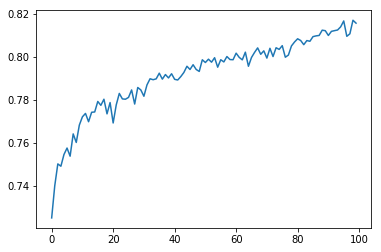

In [0]:
# Use the history object that is returned from model.fit to make graphs of the 
# model's loss or train/validation accuracies by epoch.

# Plot training & validation accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.